# I would like to make a simple comparison between C.F. filtered features and avaraged CNN features.
* The evaluation will be based on top 10 ranking items.
* The data set will be from Scrap_images_for_view2buy, which contains events that have > 20 viewed items and we have extracted features as well as images.

## Todo
1. Plot images and visualize how item-similarity-based CF predicts the similar items.
2. Based on recommended similar items for each view_item, extract features from all of those similar items and average them as user_features.
3. From step 2, compare the prediction between these new user_features and original user_features.

## Result
1. The rationale is correct, but the procedure of data processing is inaccurate in the end, thus the uer_CF_features and user_Ori_features are not correct.
2. However, I corrected it in the Evaluation again with CF... notebook. The real ranking and real score will be revealed there.

In [1]:
import pandas as pd
import numpy as np
import os
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity
import operator
import cv2
import glob
from keras.preprocessing import image
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


In [2]:
os.chdir('/Users/Walkon302/Desktop/deep-learning-models-master/view2buy')

In [3]:
df = pd.read_pickle('view2buy_url.pkl')

In [4]:
df.shape

(17460, 15)

In [5]:
df.head()

,0,user_id,buy_spu,buy_sn,buy_ct3,view_spu,view_sn,view_ct3,time_interval,view_cnt,view_secondes,view_features,buy_features,spu,url
0,4209887493\t453532580309307392\t10004616\t334\...,4209887493,453532580309307392,10004616,334,14150170026959126,10010102,334,21114,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.1, 1.804, 0.049, 0.883, 0.092, 0.053, 0.042...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...
1,529805243\t103096245561765919\t10010102\t334\t...,529805243,103096245561765919,10010102,334,14150170026959126,10010102,334,37794,4,66,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.467, 0.385, 0.0, 0.043, 0.292, 0.0, 0.448, ...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...
2,3748045464\t446777176556679168\t10005711\t334\...,3748045464,446777176556679168,10005711,334,14150170026959126,10010102,334,18820,1,34,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.018, 0.161, 0.088, 0.141, 0.231, 0.0, 0.036...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...
3,4209887493\t438895881520357521\t10004616\t334\...,4209887493,438895881520357521,10004616,334,14150170026959126,10010102,334,13978,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.036, 0.439, 0.0, 0.074, 0.194, 0.0, 0.331, ...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...
4,4209887493\t74104320184119307\t10004616\t334\t...,4209887493,74104320184119307,10004616,334,14150170026959126,10010102,334,14313,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.078, 2.304, 0.132, 0.191, 0.0, 0.087, 0.341...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...


In [26]:
df_cf = df.groupby(['view_spu','user_id', 'view_cnt']).count()

In [27]:
df_cf = df_cf.reset_index()[['user_id', 'view_spu', 'view_cnt']]
df_cf.head()

,user_id,view_spu,view_cnt
0,1429699002,357872333107204,2
1,2158456481,357872333107204,4
2,2182405033,357872333107204,1
3,3292098022,357872333107204,1
4,1480300841,357875526680651,2


In [28]:
piv = df_cf.pivot_table(index=['user_id'], columns=['view_spu'], values='view_cnt')

In [31]:
piv.head()

view_spu,357872333107204,357875526680651,357882254983171,357901107539985,639360131194904,639369692328147,639371126526005,639389503180805,639392717246493,920816362999808,...,9037674851989819400,9038237806216196097,9039645182176481286,9039926651803541506,9041615583843246080,9088621908743286785,9089747807251402752,9090029283626840066,9090592232181542912,9094251405871296512
user_id,,,,,,,,,,,,,,,,,,,,,
3440325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7052311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9254280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15286946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32626686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Normalized to average of clickes
piv_norm = piv.apply(lambda x: (x/np.mean(x)), axis=1)

In [35]:
piv_norm.head()

view_spu,357872333107204,357875526680651,357882254983171,357901107539985,639360131194904,639369692328147,639371126526005,639389503180805,639392717246493,920816362999808,...,9037674851989819400,9038237806216196097,9039645182176481286,9039926651803541506,9041615583843246080,9088621908743286785,9089747807251402752,9090029283626840066,9090592232181542912,9094251405871296512
user_id,,,,,,,,,,,,,,,,,,,,,
3440325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.438356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7052311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9254280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15286946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32626686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
piv_norm.fillna(0, inplace=True)

In [38]:
piv_norm = piv_norm.T
piv_norm = piv_norm.loc[:, (piv_norm != 0).any(axis=0)]

In [39]:
piv_sparse = sp.sparse.csr_matrix(piv_norm.values)

In [40]:
piv_sparse

<2155x361 sparse matrix of type '<type 'numpy.float64'>'
	with 12778 stored elements in Compressed Sparse Row format>

In [41]:
item_similarity = cosine_similarity(piv_sparse)
user_similarity = cosine_similarity(piv_sparse.T)

In [42]:
item_sim_df = pd.DataFrame(item_similarity, index = piv_norm.index, columns = piv_norm.index)
user_sim_df = pd.DataFrame(user_similarity, index = piv_norm.columns, columns = piv_norm.columns)

In [329]:
item_sim_df.head()

view_spu,357872333107204,357875526680651,357882254983171,357901107539985,639360131194904,639369692328147,639371126526005,639389503180805,639392717246493,920816362999808,...,9037674851989819400,9038237806216196097,9039645182176481286,9039926651803541506,9041615583843246080,9088621908743286785,9089747807251402752,9090029283626840066,9090592232181542912,9094251405871296512
view_spu,,,,,,,,,,,,,,,,,,,,,
357872333107204,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
357875526680651,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
357882254983171,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.63211,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
357901107539985,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013268,0.0
639360131194904,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [44]:
def top_product(product_name):
    count = 1
    print('Similar products to {} include:\n'.format(product_name))
    for item in item_sim_df.sort_values(by = product_name, ascending = False).index[1:11]:
        print('No. {}: {}'.format(count, item))
        count +=1
    return item_sim_df.sort_values(by = product_name, ascending = False).index[1:11]

In [111]:
def top_product_noprint(product_name):
    return list(item_sim_df.sort_values(by = product_name, ascending = False).index[1:11])

In [112]:
b = top_product_noprint(639371126526005)

In [113]:
b

[2166589220222894080,
 444243906496860160,
 461132458872606754,
 452406680821547008,
 937950908773744640,
 1586187811960238082,
 1099236096233168896,
 1102050800015937536,
 98311167513120777,
 8951824985835937792]

In [105]:
item_sim_df.sort_values(by = 639371126526005, ascending = False)[1:11]

view_spu,357872333107204,357875526680651,357882254983171,357901107539985,639360131194904,639369692328147,639371126526005,639389503180805,639392717246493,920816362999808,...,9037674851989819400,9038237806216196097,9039645182176481286,9039926651803541506,9041615583843246080,9088621908743286785,9089747807251402752,9090029283626840066,9090592232181542912,9094251405871296512
view_spu,,,,,,,,,,,,,,,,,,,,,
2166589220222894080,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
444243906496860160,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
461132458872606754,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
452406680821547008,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
937950908773744640,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1586187811960238082,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1099236096233168896,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1102050800015937536,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98311167513120777,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
def top_users(user):
    
    if user not in piv_norm.columns:
        return('No data available on user {}'.format(user))
    
    print('Most Similar Users:\n')
    sim_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:11]
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    zipped = zip(sim_users, sim_values,)
    for user, sim in zipped:
        print('User #{0}, Similarity value: {1:.2f}'.format(user, sim)) 

In [47]:
def similar_user_recs(user):
    
    if user not in piv_norm.columns:
        return('No data available on user {}'.format(user))
    
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    best = []
    most_common = {}
    
    for i in sim_users:
        max_score = piv_norm.loc[:, i].max()
        best.append(piv_norm[piv_norm.loc[:, i]==max_score].index.tolist())
    for i in range(len(best)):
        for j in best[i]:
            if j in most_common:
                most_common[j] += 1
            else:
                most_common[j] = 1
    sorted_list = sorted(most_common.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_list[:5]   

In [48]:
def predicted_rating(anime_name, user):
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:1000]
    user_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:1000]
    rating_list = []
    weight_list = []
    for j, i in enumerate(sim_users):
        rating = piv.loc[i, anime_name]
        similarity = user_values[j]
        if np.isnan(rating):
            continue
        elif not np.isnan(rating):
            rating_list.append(rating*similarity)
            weight_list.append(similarity)
    return sum(rating_list)/sum(weight_list)    

In [49]:
view_image = pd.DataFrame(glob.glob('view_data_image/*.jpg'))

In [50]:
view_image['produuct'] = view_image[0].apply(lambda x: int(x[16:-4]))

In [51]:
view_image.columns = [['file', 'product']]

In [52]:
def plot_top_rank(product_id):
    candidate = top_product(product_id)
    candidate_df = view_image[view_image['product'].isin(candidate)]
    test_view = candidate_df['file']
    
    fig,axes = plt.subplots(1, len(test_view))

    for i in range(len(test_view)):
        img = image.load_img(test_view.iloc[i], target_size=(224, 224))
        # images
        axes[i].imshow(img)
        axes[i].set_xticklabels([])
        #axes[0,i].get_xaxis().set_visible(False)
        axes[i].get_xaxis().set_ticks([])
        axes[i].get_yaxis().set_visible(False) 

Similar products to 639371126526005 include:

No. 1: 2166589220222894080
No. 2: 444243906496860160
No. 3: 461132458872606754
No. 4: 452406680821547008
No. 5: 937950908773744640
No. 6: 1586187811960238082
No. 7: 1099236096233168896
No. 8: 1102050800015937536
No. 9: 98311167513120777
No. 10: 8951824985835937792


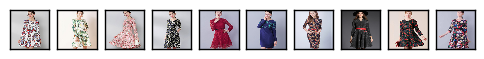

In [53]:
plot_top_rank(639371126526005)

In [121]:
df['CF_item'] = df['view_spu'].apply(lambda x: top_product_noprint(x))

In [152]:
df

,0,user_id,buy_spu,buy_sn,buy_ct3,view_spu,view_sn,view_ct3,time_interval,view_cnt,view_secondes,view_features,buy_features,spu,url,CF_item
0,4209887493\t453532580309307392\t10004616\t334\...,4209887493,453532580309307392,10004616,334,14150170026959126,10010102,334,21114,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.1, 1.804, 0.049, 0.883, 0.092, 0.053, 0.042...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747..."
1,529805243\t103096245561765919\t10010102\t334\t...,529805243,103096245561765919,10010102,334,14150170026959126,10010102,334,37794,4,66,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.467, 0.385, 0.0, 0.043, 0.292, 0.0, 0.448, ...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747..."
2,3748045464\t446777176556679168\t10005711\t334\...,3748045464,446777176556679168,10005711,334,14150170026959126,10010102,334,18820,1,34,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.018, 0.161, 0.088, 0.141, 0.231, 0.0, 0.036...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747..."
3,4209887493\t438895881520357521\t10004616\t334\...,4209887493,438895881520357521,10004616,334,14150170026959126,10010102,334,13978,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.036, 0.439, 0.0, 0.074, 0.194, 0.0, 0.331, ...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747..."
4,4209887493\t74104320184119307\t10004616\t334\t...,4209887493,74104320184119307,10004616,334,14150170026959126,10010102,334,14313,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.078, 2.304, 0.132, 0.191, 0.0, 0.087, 0.341...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747..."
5,4209887493\t453532580309307392\t10004616\t334\...,4209887493,453532580309307392,10004616,334,99155636687355977,10023064,334,18202,1,22,"[0.349, 0.394, 0.007, 2.666, 0.009, 0.0, 0.0, ...","[0.1, 1.804, 0.049, 0.883, 0.092, 0.053, 0.042...",99155636687355977,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[438895881520357521, 74104320184119307, 443680..."
6,4209887493\t438895881520357521\t10004616\t334\...,4209887493,438895881520357521,10004616,334,99155636687355977,10023064,334,11066,1,22,"[0.349, 0.394, 0.007, 2.666, 0.009, 0.0, 0.0, ...","[0.036, 0.439, 0.0, 0.074, 0.194, 0.0, 0.331, ...",99155636687355977,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[438895881520357521, 74104320184119307, 443680..."
7,4209887493\t74104320184119307\t10004616\t334\t...,4209887493,74104320184119307,10004616,334,99155636687355977,10023064,334,11401,1,22,"[0.349, 0.394, 0.007, 2.666, 0.009, 0.0, 0.0, ...","[0.078, 2.304, 0.132, 0.191, 0.0, 0.087, 0.341...",99155636687355977,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[438895881520357521, 74104320184119307, 443680..."
8,4209887493\t453532580309307392\t10004616\t334\...,4209887493,453532580309307392,10004616,334,82548613061427358,10023064,334,18053,2,10,"[0.261, 1.139, 0.074, 2.173, 0.081, 0.0, 0.158...","[0.1, 1.804, 0.049, 0.883, 0.092, 0.053, 0.042...",82548613061427358,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[438895881520357521, 74104320184119307, 443680..."
9,4209887493\t438895881520357521\t10004616\t334\...,4209887493,438895881520357521,10004616,334,82548613061427358,10023064,334,10917,2,10,"[0.261, 1.139, 0.074, 2.173, 0.081, 0.0, 0.158...","[0.036, 0.439, 0.0, 0.074, 0.194, 0.0, 0.331, ...",82548613061427358,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[438895881520357521, 74104320184119307, 443680..."


In [123]:
#df.to_pickle('view2buy_url_CF.pkl')

In [149]:
df_spu = pd.DataFrame(df.groupby('spu').count().reset_index()['spu'])

In [156]:
df_spu.head()

,spu
0,357872333107204
1,357875526680651
2,357882254983171
3,357901107539985
4,639360131194904


In [170]:
# assign CF_item to each spu
df_spu['CF_item'] = df_spu.apply(lambda x: df[df['spu'] == x['spu']]['CF_item'].iloc[0], axis = 1)

In [174]:
# Assign item feature for each spu
df_spu['spu_features'] = df_spu.apply(lambda x: df[df['spu'] == x['spu']]['view_features'].iloc[0], axis = 1)

In [175]:
df_spu.head()

,spu,CF_item,spu_features
0,357872333107204,"[8952950888272863232, 1664156381170176000, 284...","[0.035, 0.385, 0.112, 0.014, 0.0, 0.123, 0.438..."
1,357875526680651,"[2046769978417582, 461413925257830545, 3255052...","[0.132, 1.678, 0.061, 0.918, 0.462, 0.342, 0.4..."
2,357882254983171,"[459725075493814272, 8582811288237465674, 1976...","[0.026, 0.936, 0.056, 0.614, 0.139, 0.0, 0.302..."
3,357901107539985,"[2466922956389351424, 8459806721299259392, 780...","[0.229, 0.543, 0.132, 0.144, 0.295, 0.018, 0.0..."
4,639360131194904,"[451843765076328474, 81141212316332372, 320394...","[1.113, 0.5, 0.758, 0.218, 0.0, 0.0, 0.335, 1...."


In [208]:
# Assign item_features for all CF_item
df_spu['CF_features'] = df_spu.apply(lambda x: [df_spu[df_spu['spu'] == i]['spu_features'] for i in x['CF_item']], axis = 1)

In [209]:
df_spu.head()

,spu,CF_item,spu_features,CF_features
0,357872333107204,"[8952950888272863232, 1664156381170176000, 284...","[0.035, 0.385, 0.112, 0.014, 0.0, 0.123, 0.438...","[[[0.462, 0.551, 0.068, 0.833, 0.0, 0.0, 0.0, ..."
1,357875526680651,"[2046769978417582, 461413925257830545, 3255052...","[0.132, 1.678, 0.061, 0.918, 0.462, 0.342, 0.4...","[[[0.357, 2.503, 0.0, 0.641, 0.143, 0.0, 0.104..."
2,357882254983171,"[459725075493814272, 8582811288237465674, 1976...","[0.026, 0.936, 0.056, 0.614, 0.139, 0.0, 0.302...","[[[1.884, 0.52, 0.0, 3.98, 0.175, 0.008, 0.663..."
3,357901107539985,"[2466922956389351424, 8459806721299259392, 780...","[0.229, 0.543, 0.132, 0.144, 0.295, 0.018, 0.0...","[[[0.124, 0.819, 0.0, 0.596, 0.306, 0.043, 0.2..."
4,639360131194904,"[451843765076328474, 81141212316332372, 320394...","[1.113, 0.5, 0.758, 0.218, 0.0, 0.0, 0.335, 1....","[[[0.501, 0.12, 0.0, 0.0, 0.23, 0.108, 0.377, ..."


In [265]:
# Calculate the average features from 10 CF_recommended items for each spu
def CF_ave(CF_list):
    return [np.mean(i) for i in zip(*[list(x)[0] for x in CF_list])]

In [267]:
df_spu['ave_CF_fea'] = df_spu.apply(lambda x: CF_ave(x['CF_features']), axis = 1)

In [272]:
df_spu.head()

,spu,CF_item,spu_features,CF_features,ave_CF_fea
0,357872333107204,"[8952950888272863232, 1664156381170176000, 284...","[0.035, 0.385, 0.112, 0.014, 0.0, 0.123, 0.438...","[[[0.462, 0.551, 0.068, 0.833, 0.0, 0.0, 0.0, ...","[0.4269, 0.6321, 0.101, 0.9695, 0.2211, 0.131,..."
1,357875526680651,"[2046769978417582, 461413925257830545, 3255052...","[0.132, 1.678, 0.061, 0.918, 0.462, 0.342, 0.4...","[[[0.357, 2.503, 0.0, 0.641, 0.143, 0.0, 0.104...","[0.4727, 0.8078, 0.0697, 0.5796, 0.3075, 0.009..."
2,357882254983171,"[459725075493814272, 8582811288237465674, 1976...","[0.026, 0.936, 0.056, 0.614, 0.139, 0.0, 0.302...","[[[1.884, 0.52, 0.0, 3.98, 0.175, 0.008, 0.663...","[0.6206, 0.8754, 0.1066, 0.7549, 0.2387, 0.186..."
3,357901107539985,"[2466922956389351424, 8459806721299259392, 780...","[0.229, 0.543, 0.132, 0.144, 0.295, 0.018, 0.0...","[[[0.124, 0.819, 0.0, 0.596, 0.306, 0.043, 0.2...","[0.4016, 0.6379, 0.2088, 0.7764, 0.3335, 0.012..."
4,639360131194904,"[451843765076328474, 81141212316332372, 320394...","[1.113, 0.5, 0.758, 0.218, 0.0, 0.0, 0.335, 1....","[[[0.501, 0.12, 0.0, 0.0, 0.23, 0.108, 0.377, ...","[0.2916, 0.5296, 0.0964, 0.3321, 0.1873, 0.022..."


In [273]:
#df_spu.to_pickle('spu_CF_features.pkl')

In [275]:
# Assign user_CF_fea back to df
df2 = pd.merge(df, df_spu[['spu', 'CF_item', 'ave_CF_fea']], on='spu')

In [283]:
#df2.to_pickle('view2buy_url_CF_fea.pkl')

Similar products to 82548613061427358 include:

No. 1: 438895881520357521
No. 2: 74104320184119307
No. 3: 443680956124434457
No. 4: 8720452635027472384
No. 5: 3061398180775350287
No. 6: 97185268274397914
No. 7: 93807568553869425
No. 8: 82548613061427358
No. 9: 461976829617950723
No. 10: 99155636687355977


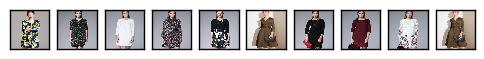

In [155]:
plot_top_rank(82548613061427358)

In [324]:
df[['view_spu', 'CF_item']].head()

,view_spu,CF_item
0,14150170026959126,"[82267097285177879, 12742773141631009, 3341747..."
1,14150170026959126,"[82267097285177879, 12742773141631009, 3341747..."
2,14150170026959126,"[82267097285177879, 12742773141631009, 3341747..."
3,14150170026959126,"[82267097285177879, 12742773141631009, 3341747..."
4,14150170026959126,"[82267097285177879, 12742773141631009, 3341747..."


In [285]:
def dot(K, L):
    if len(K) != len(L): return 0
    return sum(i[0]*i[1] for i in zip(K, L))

def similarity(item_1, item_2):
    return dot(item_1, item_2) / np.sqrt(dot(item_1, item_1)*dot(item_2, item_2))

def average(lists):
    return [np.mean(i) for i in zip(*[l for l in lists])]

In [284]:
df2.head()

,0,user_id,buy_spu,buy_sn,buy_ct3,view_spu,view_sn,view_ct3,time_interval,view_cnt,view_secondes,view_features,buy_features,spu,url,CF_item_x,CF_item_y,ave_CF_fea
0,4209887493\t453532580309307392\t10004616\t334\...,4209887493,453532580309307392,10004616,334,14150170026959126,10010102,334,21114,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.1, 1.804, 0.049, 0.883, 0.092, 0.053, 0.042...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747...","[82267097285177879, 12742773141631009, 3341747...","[0.5528, 1.3589, 0.0329, 0.2652, 0.1121, 0.070..."
1,529805243\t103096245561765919\t10010102\t334\t...,529805243,103096245561765919,10010102,334,14150170026959126,10010102,334,37794,4,66,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.467, 0.385, 0.0, 0.043, 0.292, 0.0, 0.448, ...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747...","[82267097285177879, 12742773141631009, 3341747...","[0.5528, 1.3589, 0.0329, 0.2652, 0.1121, 0.070..."
2,3748045464\t446777176556679168\t10005711\t334\...,3748045464,446777176556679168,10005711,334,14150170026959126,10010102,334,18820,1,34,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.018, 0.161, 0.088, 0.141, 0.231, 0.0, 0.036...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747...","[82267097285177879, 12742773141631009, 3341747...","[0.5528, 1.3589, 0.0329, 0.2652, 0.1121, 0.070..."
3,4209887493\t438895881520357521\t10004616\t334\...,4209887493,438895881520357521,10004616,334,14150170026959126,10010102,334,13978,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.036, 0.439, 0.0, 0.074, 0.194, 0.0, 0.331, ...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747...","[82267097285177879, 12742773141631009, 3341747...","[0.5528, 1.3589, 0.0329, 0.2652, 0.1121, 0.070..."
4,4209887493\t74104320184119307\t10004616\t334\t...,4209887493,74104320184119307,10004616,334,14150170026959126,10010102,334,14313,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.078, 2.304, 0.132, 0.191, 0.0, 0.087, 0.341...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747...","[82267097285177879, 12742773141631009, 3341747...","[0.5528, 1.3589, 0.0329, 0.2652, 0.1121, 0.070..."


In [286]:
CF_user_fea = df2.groupby(['user_id'])['ave_CF_fea'].apply(lambda x: average(x))
CF_user_fea = pd.DataFrame(CF_user_fea)
CF_user_fea = CF_user_fea.reset_index()
df2 = pd.merge(df2, CF_user_fea, on='user_id')

In [289]:
df2.rename(columns = {'ave_CF_fea_y':'user_features'}, inplace = True)
df2.head()

,0,user_id,buy_spu,buy_sn,buy_ct3,view_spu,view_sn,view_ct3,time_interval,view_cnt,view_secondes,view_features,buy_features,spu,url,CF_item_x,CF_item_y,ave_CF_fea_x,user_features
0,4209887493\t453532580309307392\t10004616\t334\...,4209887493,453532580309307392,10004616,334,14150170026959126,10010102,334,21114,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.1, 1.804, 0.049, 0.883, 0.092, 0.053, 0.042...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747...","[82267097285177879, 12742773141631009, 3341747...","[0.5528, 1.3589, 0.0329, 0.2652, 0.1121, 0.070...","[0.239576, 0.810066, 0.035606, 0.628386, 0.164..."
1,4209887493\t438895881520357521\t10004616\t334\...,4209887493,438895881520357521,10004616,334,14150170026959126,10010102,334,13978,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.036, 0.439, 0.0, 0.074, 0.194, 0.0, 0.331, ...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747...","[82267097285177879, 12742773141631009, 3341747...","[0.5528, 1.3589, 0.0329, 0.2652, 0.1121, 0.070...","[0.239576, 0.810066, 0.035606, 0.628386, 0.164..."
2,4209887493\t74104320184119307\t10004616\t334\t...,4209887493,74104320184119307,10004616,334,14150170026959126,10010102,334,14313,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.078, 2.304, 0.132, 0.191, 0.0, 0.087, 0.341...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747...","[82267097285177879, 12742773141631009, 3341747...","[0.5528, 1.3589, 0.0329, 0.2652, 0.1121, 0.070...","[0.239576, 0.810066, 0.035606, 0.628386, 0.164..."
3,4209887493\t453532580309307392\t10004616\t334\...,4209887493,453532580309307392,10004616,334,99155636687355977,10023064,334,18202,1,22,"[0.349, 0.394, 0.007, 2.666, 0.009, 0.0, 0.0, ...","[0.1, 1.804, 0.049, 0.883, 0.092, 0.053, 0.042...",99155636687355977,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[438895881520357521, 74104320184119307, 443680...","[438895881520357521, 74104320184119307, 443680...","[0.146, 0.7319, 0.0257, 0.6735, 0.1741, 0.0252...","[0.239576, 0.810066, 0.035606, 0.628386, 0.164..."
4,4209887493\t438895881520357521\t10004616\t334\...,4209887493,438895881520357521,10004616,334,99155636687355977,10023064,334,11066,1,22,"[0.349, 0.394, 0.007, 2.666, 0.009, 0.0, 0.0, ...","[0.036, 0.439, 0.0, 0.074, 0.194, 0.0, 0.331, ...",99155636687355977,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[438895881520357521, 74104320184119307, 443680...","[438895881520357521, 74104320184119307, 443680...","[0.146, 0.7319, 0.0257, 0.6735, 0.1741, 0.0252...","[0.239576, 0.810066, 0.035606, 0.628386, 0.164..."


In [290]:
df2['CF_sim'] = df2.apply(lambda x: similarity(x['buy_features'], x['user_features']), axis=1)

In [294]:
df2['CF_rank'] = df2.groupby('user_id')['CF_sim'].rank(ascending=False)

In [312]:
float(len(df2.query('buy_spu == view_spu & CF_rank <= 20')))/float(len(df2.query('buy_spu == view_spu'))) * 100

52.52173913043479

In [300]:
ori_user_fea = df2.groupby(['user_id'])['view_features'].apply(lambda x: average(x))
ori_user_fea = pd.DataFrame(ori_user_fea)
ori_user_fea = ori_user_fea.reset_index()
df2 = pd.merge(df2, ori_user_fea, on='user_id')

In [302]:
df2.rename(columns = {'view_features_y':'ori_user_features'}, inplace = True)
df2.head()

,0,user_id,buy_spu,buy_sn,buy_ct3,view_spu,view_sn,view_ct3,time_interval,view_cnt,...,buy_features,spu,url,CF_item_x,CF_item_y,ave_CF_fea_x,user_features,CF_sim,CF_rank,ori_user_features
0,4209887493\t453532580309307392\t10004616\t334\...,4209887493,453532580309307392,10004616,334,14150170026959126,10010102,334,21114,1,...,"[0.1, 1.804, 0.049, 0.883, 0.092, 0.053, 0.042...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747...","[82267097285177879, 12742773141631009, 3341747...","[0.5528, 1.3589, 0.0329, 0.2652, 0.1121, 0.070...","[0.239576, 0.810066, 0.035606, 0.628386, 0.164...",0.844045,41.5,"[0.19106, 0.82626, 0.0194, 0.53946, 0.18018, 0..."
1,4209887493\t438895881520357521\t10004616\t334\...,4209887493,438895881520357521,10004616,334,14150170026959126,10010102,334,13978,1,...,"[0.036, 0.439, 0.0, 0.074, 0.194, 0.0, 0.331, ...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747...","[82267097285177879, 12742773141631009, 3341747...","[0.5528, 1.3589, 0.0329, 0.2652, 0.1121, 0.070...","[0.239576, 0.810066, 0.035606, 0.628386, 0.164...",0.856012,8.5,"[0.19106, 0.82626, 0.0194, 0.53946, 0.18018, 0..."
2,4209887493\t74104320184119307\t10004616\t334\t...,4209887493,74104320184119307,10004616,334,14150170026959126,10010102,334,14313,1,...,"[0.078, 2.304, 0.132, 0.191, 0.0, 0.087, 0.341...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747...","[82267097285177879, 12742773141631009, 3341747...","[0.5528, 1.3589, 0.0329, 0.2652, 0.1121, 0.070...","[0.239576, 0.810066, 0.035606, 0.628386, 0.164...",0.848547,24.5,"[0.19106, 0.82626, 0.0194, 0.53946, 0.18018, 0..."
3,4209887493\t453532580309307392\t10004616\t334\...,4209887493,453532580309307392,10004616,334,99155636687355977,10023064,334,18202,1,...,"[0.1, 1.804, 0.049, 0.883, 0.092, 0.053, 0.042...",99155636687355977,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[438895881520357521, 74104320184119307, 443680...","[438895881520357521, 74104320184119307, 443680...","[0.146, 0.7319, 0.0257, 0.6735, 0.1741, 0.0252...","[0.239576, 0.810066, 0.035606, 0.628386, 0.164...",0.844045,41.5,"[0.19106, 0.82626, 0.0194, 0.53946, 0.18018, 0..."
4,4209887493\t438895881520357521\t10004616\t334\...,4209887493,438895881520357521,10004616,334,99155636687355977,10023064,334,11066,1,...,"[0.036, 0.439, 0.0, 0.074, 0.194, 0.0, 0.331, ...",99155636687355977,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[438895881520357521, 74104320184119307, 443680...","[438895881520357521, 74104320184119307, 443680...","[0.146, 0.7319, 0.0257, 0.6735, 0.1741, 0.0252...","[0.239576, 0.810066, 0.035606, 0.628386, 0.164...",0.856012,8.5,"[0.19106, 0.82626, 0.0194, 0.53946, 0.18018, 0..."


In [303]:
df2['ori_sim'] = df2.apply(lambda x: similarity(x['buy_features'], x['ori_user_features']), axis=1)

In [304]:
df2['ori_rank'] = df2.groupby('user_id')['ori_sim'].rank(ascending=False)

In [305]:
df2.head()

,0,user_id,buy_spu,buy_sn,buy_ct3,view_spu,view_sn,view_ct3,time_interval,view_cnt,...,url,CF_item_x,CF_item_y,ave_CF_fea_x,user_features,CF_sim,CF_rank,ori_user_features,ori_sim,ori_rank
0,4209887493\t453532580309307392\t10004616\t334\...,4209887493,453532580309307392,10004616,334,14150170026959126,10010102,334,21114,1,...,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747...","[82267097285177879, 12742773141631009, 3341747...","[0.5528, 1.3589, 0.0329, 0.2652, 0.1121, 0.070...","[0.239576, 0.810066, 0.035606, 0.628386, 0.164...",0.844045,41.5,"[0.19106, 0.82626, 0.0194, 0.53946, 0.18018, 0...",0.846224,25.5
1,4209887493\t438895881520357521\t10004616\t334\...,4209887493,438895881520357521,10004616,334,14150170026959126,10010102,334,13978,1,...,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747...","[82267097285177879, 12742773141631009, 3341747...","[0.5528, 1.3589, 0.0329, 0.2652, 0.1121, 0.070...","[0.239576, 0.810066, 0.035606, 0.628386, 0.164...",0.856012,8.5,"[0.19106, 0.82626, 0.0194, 0.53946, 0.18018, 0...",0.858529,8.5
2,4209887493\t74104320184119307\t10004616\t334\t...,4209887493,74104320184119307,10004616,334,14150170026959126,10010102,334,14313,1,...,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747...","[82267097285177879, 12742773141631009, 3341747...","[0.5528, 1.3589, 0.0329, 0.2652, 0.1121, 0.070...","[0.239576, 0.810066, 0.035606, 0.628386, 0.164...",0.848547,24.5,"[0.19106, 0.82626, 0.0194, 0.53946, 0.18018, 0...",0.832240,42.5
3,4209887493\t453532580309307392\t10004616\t334\...,4209887493,453532580309307392,10004616,334,99155636687355977,10023064,334,18202,1,...,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[438895881520357521, 74104320184119307, 443680...","[438895881520357521, 74104320184119307, 443680...","[0.146, 0.7319, 0.0257, 0.6735, 0.1741, 0.0252...","[0.239576, 0.810066, 0.035606, 0.628386, 0.164...",0.844045,41.5,"[0.19106, 0.82626, 0.0194, 0.53946, 0.18018, 0...",0.846224,25.5
4,4209887493\t438895881520357521\t10004616\t334\...,4209887493,438895881520357521,10004616,334,99155636687355977,10023064,334,11066,1,...,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[438895881520357521, 74104320184119307, 443680...","[438895881520357521, 74104320184119307, 443680...","[0.146, 0.7319, 0.0257, 0.6735, 0.1741, 0.0252...","[0.239576, 0.810066, 0.035606, 0.628386, 0.164...",0.856012,8.5,"[0.19106, 0.82626, 0.0194, 0.53946, 0.18018, 0...",0.858529,8.5


In [311]:
float(len(df2.query('buy_spu == view_spu & ori_rank <= 20')))/float(len(df2.query('buy_spu == view_spu'))) * 100

53.391304347826086

In [313]:
df2.query('buy_spu == view_spu & ori_rank <= 20')

,0,user_id,buy_spu,buy_sn,buy_ct3,view_spu,view_sn,view_ct3,time_interval,view_cnt,...,url,CF_item_x,CF_item_y,ave_CF_fea_x,user_features,CF_sim,CF_rank,ori_user_features,ori_sim,ori_rank
19,4209887493\t438895881520357521\t10004616\t334\...,4209887493,438895881520357521,10004616,334,438895881520357521,10004616,334,0,10,...,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[438895881520357521, 74104320184119307, 443680...","[438895881520357521, 74104320184119307, 443680...","[0.146, 0.7319, 0.0257, 0.6735, 0.1741, 0.0252...","[0.239576, 0.810066, 0.035606, 0.628386, 0.164...",0.856012,8.5,"[0.19106, 0.82626, 0.0194, 0.53946, 0.18018, 0...",0.858529,8.5
59,529805243\t103096245561765919\t10010102\t334\t...,529805243,103096245561765919,10010102,334,103096245561765919,10010102,334,0,15,...,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[432984919028166664, 103096245561765919, 88845...","[432984919028166664, 103096245561765919, 88845...","[0.4964, 1.4481, 0.0383, 0.2953, 0.1801, 0.064...","[0.491673913043, 1.41827826087, 0.0395, 0.2952...",0.870670,12.0,"[0.42652173913, 1.05895652174, 0.0372608695652...",0.862389,12.0
151,452067350\t447621605798383646\t10004616\t334\t...,452067350,447621605798383646,10004616,334,447621605798383646,10004616,334,0,34,...,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[443118006171013127, 441147681334038541, 45634...","[443118006171013127, 441147681334038541, 45634...","[0.3717, 0.5098, 0.0997, 0.4122, 0.351, 0.0193...","[0.34255, 0.609228571429, 0.0829642857143, 0.4...",0.848445,14.5,"[0.37725, 0.702392857143, 0.0561071428571, 0.3...",0.812620,14.5
156,15286946\t453532609002410015\t10004555\t334\t4...,15286946,453532609002410015,10004555,334,453532609002410015,10004555,334,0,17,...,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[34416385332351047, 305758246909599747, 420981...","[34416385332351047, 305758246909599747, 420981...","[0.3937, 0.8731, 0.1322, 0.7968, 0.2441, 0.150...","[0.352367857143, 0.822589285714, 0.08528214285...",0.815574,14.5,"[0.321392857143, 0.776428571429, 0.14339285714...",0.810338,14.5
346,3223935950\t97185296913813714\t10021212\t334\t...,3223935950,97185296913813714,10021212,334,97185296913813714,10021212,334,0,11,...,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[81985618826645681, 291684485703237653, 294217...","[81985618826645681, 291684485703237653, 294217...","[0.4359, 0.6037, 0.0134, 0.5149, 0.1817, 0.051...","[0.375063636364, 0.858648484848, 0.05751212121...",0.856785,17.0,"[0.323515151515, 0.714272727273, 0.06439393939...",0.859584,17.0
414,592461982\t84800366075408747\t10000799\t334\t8...,592461982,84800366075408747,10000799,334,84800366075408747,10000799,334,0,4,...,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[84800366075408747, 318987586043674889, 451562...","[84800366075408747, 318987586043674889, 451562...","[0.4656, 0.5098, 0.1457, 0.8828, 0.3535, 0.232...","[0.421535897436, 0.595582051282, 0.11993846153...",0.741503,20.0,"[0.47958974359, 0.648820512821, 0.104, 0.88682...",0.729918,20.0
489,3994880652\t2885476247461195776\t10015294\t334...,3994880652,2885476247461195776,10015294,334,2885476247461195776,10015294,334,0,17,...,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[306321212091695188, 458317700514025542, 40524...","[306321212091695188, 458317700514025542, 40524...","[0.67, 0.5411, 0.0644, 0.868, 0.3529, 0.1367, ...","[0.472656923077, 0.707832307692, 0.10590615384...",0.805711,13.0,"[0.4698, 0.919953846154, 0.126323076923, 0.963...",0.827058,13.0
630,2608322838\t106755436261761039\t10014872\t334\...,2608322838,106755436261761039,10014872,334,106755436261761039,10014872,334,0,12,...,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[24001773283258462, 1675133904153440256, 45353...","[24001773283258462, 1675133904153440256, 45353...","[0.6804, 0.8802, 0.1442, 1.1184, 0.1597, 0.274...","[0.454444303797, 0.78082278481, 0.098739240506...",0.778231,13.0,"[0.387848101266, 0.805202531646, 0.10164556962...",0.790961,13.0
650,2947561985\t

In [325]:
#df2.to_pickle('view2buy_url_CF_fea_sim.pkl')

In [322]:
# The average of similarity between original view_features and buy_features
np.mean(df2.query('buy_spu == view_spu')['ori_sim'])

0.8022949340937618

In [323]:
# The average of similarity between CF_view_features and buy_features
np.mean(df2.query('buy_spu == view_spu')['CF_sim'])

0.790564987299363

# From this point, the original features is slightly better than CF_features. This may be caused of that 10 recommended items are too many and there are more noise.

# Try decrease the number of recommended items for each view item from 10 to 5 and see how this altered CF_sim

In [330]:
def top_product_noprint(product_name):
    return list(item_sim_df.sort_values(by = product_name, ascending = False).index[1:6])

In [331]:
df['CF_item'] = df['view_spu'].apply(lambda x: top_product_noprint(x))

In [332]:
df_spu = pd.DataFrame(df.groupby('spu').count().reset_index()['spu'])

In [333]:
# assign CF_item to each spu
df_spu['CF_item'] = df_spu.apply(lambda x: df[df['spu'] == x['spu']]['CF_item'].iloc[0], axis = 1)

In [334]:
# Assign item feature for each spu
df_spu['spu_features'] = df_spu.apply(lambda x: df[df['spu'] == x['spu']]['view_features'].iloc[0], axis = 1)

In [335]:
# Assign item_features for all CF_item
df_spu['CF_features'] = df_spu.apply(lambda x: [df_spu[df_spu['spu'] == i]['spu_features'] for i in x['CF_item']], axis = 1)

In [336]:
df_spu['ave_CF_fea'] = df_spu.apply(lambda x: CF_ave(x['CF_features']), axis = 1)

In [337]:
# Assign user_CF_fea back to df
df2 = pd.merge(df, df_spu[['spu', 'CF_item', 'ave_CF_fea']], on='spu')

In [340]:
CF_user_fea = df2.groupby(['user_id'])['ave_CF_fea'].apply(lambda x: average(x))
CF_user_fea = pd.DataFrame(CF_user_fea)
CF_user_fea = CF_user_fea.reset_index()
df2 = pd.merge(df2, CF_user_fea, on='user_id')

In [341]:
df2.rename(columns = {'ave_CF_fea_y':'user_features'}, inplace = True)
df2.head()

,0,user_id,buy_spu,buy_sn,buy_ct3,view_spu,view_sn,view_ct3,time_interval,view_cnt,view_secondes,view_features,buy_features,spu,url,CF_item_x,CF_item_y,ave_CF_fea_x,user_features
0,4209887493\t453532580309307392\t10004616\t334\...,4209887493,453532580309307392,10004616,334,14150170026959126,10010102,334,21114,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.1, 1.804, 0.049, 0.883, 0.092, 0.053, 0.042...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747...","[82267097285177879, 12742773141631009, 3341747...","[0.6808, 1.0456, 0.065, 0.1332, 0.14, 0.136, 0...","[0.20164, 0.93442, 0.038836, 0.305916, 0.11476..."
1,4209887493\t438895881520357521\t10004616\t334\...,4209887493,438895881520357521,10004616,334,14150170026959126,10010102,334,13978,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.036, 0.439, 0.0, 0.074, 0.194, 0.0, 0.331, ...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747...","[82267097285177879, 12742773141631009, 3341747...","[0.6808, 1.0456, 0.065, 0.1332, 0.14, 0.136, 0...","[0.20164, 0.93442, 0.038836, 0.305916, 0.11476..."
2,4209887493\t74104320184119307\t10004616\t334\t...,4209887493,74104320184119307,10004616,334,14150170026959126,10010102,334,14313,1,11,"[0.135, 1.078, 0.06, 0.241, 0.213, 0.22, 0.039...","[0.078, 2.304, 0.132, 0.191, 0.0, 0.087, 0.341...",14150170026959126,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[82267097285177879, 12742773141631009, 3341747...","[82267097285177879, 12742773141631009, 3341747...","[0.6808, 1.0456, 0.065, 0.1332, 0.14, 0.136, 0...","[0.20164, 0.93442, 0.038836, 0.305916, 0.11476..."
3,4209887493\t453532580309307392\t10004616\t334\...,4209887493,453532580309307392,10004616,334,99155636687355977,10023064,334,18202,1,22,"[0.349, 0.394, 0.007, 2.666, 0.009, 0.0, 0.0, ...","[0.1, 1.804, 0.049, 0.883, 0.092, 0.053, 0.042...",99155636687355977,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[438895881520357521, 74104320184119307, 443680...","[438895881520357521, 74104320184119307, 443680...","[0.091, 0.888, 0.0276, 0.1686, 0.0782, 0.05, 0...","[0.20164, 0.93442, 0.038836, 0.305916, 0.11476..."
4,4209887493\t438895881520357521\t10004616\t334\...,4209887493,438895881520357521,10004616,334,99155636687355977,10023064,334,11066,1,22,"[0.349, 0.394, 0.007, 2.666, 0.009, 0.0, 0.0, ...","[0.036, 0.439, 0.0, 0.074, 0.194, 0.0, 0.331, ...",99155636687355977,http://a.vpimg2.com/upload/merchandise/pdcvis/...,"[438895881520357521, 74104320184119307, 443680...","[438895881520357521, 74104320184119307, 443680...","[0.091, 0.888, 0.0276, 0.1686, 0.0782, 0.05, 0...","[0.20164, 0.93442, 0.038836, 0.305916, 0.11476..."


In [342]:
df2['CF_sim'] = df2.apply(lambda x: similarity(x['buy_features'], x['user_features']), axis=1)
df2['CF_rank'] = df2.groupby('user_id')['CF_sim'].rank(ascending=False)
float(len(df2.query('buy_spu == view_spu & CF_rank <= 20')))/float(len(df2.query('buy_spu == view_spu'))) * 100

52.52173913043479

In [343]:
ori_user_fea = df2.groupby(['user_id'])['view_features'].apply(lambda x: average(x))
ori_user_fea = pd.DataFrame(ori_user_fea)
ori_user_fea = ori_user_fea.reset_index()
df2 = pd.merge(df2, ori_user_fea, on='user_id')
df2.rename(columns = {'view_features_y':'ori_user_features'}, inplace = True)
df2['ori_sim'] = df2.apply(lambda x: similarity(x['buy_features'], x['ori_user_features']), axis=1)
df2['ori_rank'] = df2.groupby('user_id')['ori_sim'].rank(ascending=False)
float(len(df2.query('buy_spu == view_spu & ori_rank <= 20')))/float(len(df2.query('buy_spu == view_spu'))) * 100

53.391304347826086

## This is the average of similarity of from CF_5.

In [345]:
np.mean(df2.query('buy_spu == view_spu')['CF_sim'])

0.7892732779012652

# It turns out decreasing the number of recommended items also decreased the similarity. Thus, the next step will be choosing user more wisely that only select  users who have the same trajectory to lower the noise.